In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [37]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [38]:
path = r'C:\Users\brian\Downloads\Section 6 Cacao Project\02 Data\Prepared Data'

In [39]:
df = pd.read_csv(os.path.join(path, 'Flavors of Cacao clean.csv'))

In [40]:
df.head()

,Maker,Bean_Origin/Bar_Name,Review_Year,Cocoa_Pct,Maker_Location,Rating,Bean_Type,Bean_Origin
0,Amedei,Nine,2007,0.75,Italy,4.0,Blend,Argentina
1,Amedei,Toscano Black,2007,0.63,Italy,3.5,Blend,Argentina
2,Amedei,Toscano Black,2006,0.70,Italy,5.0,Blend,Argentina
3,Amedei,Toscano Black,2006,0.66,Italy,4.0,Blend,Argentina
4,Bahen & Co.,Houseblend,2012,0.70,Australia,2.5,Blend,Argentina


In [41]:
# Drop categorical columns as not useful for the next steps of the analysis

Dropcolumns = ['Maker', 'Maker_Location', 'Bean_Origin', 'Bean_Type', 'Bean_Origin/Bar_Name'] 

In [42]:
#3. Use the elbow technique as shown in the Jupyter notebook for this Exercise

In [43]:
# 4. The elbow technique

num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines the range of potential clusters in the data

In [44]:
df_num_col = df.drop(columns=Dropcolumns)

In [45]:
df_num_col

,Review_Year,Cocoa_Pct,Rating
0,2007,0.75,4.00
1,2007,0.63,3.50
2,2006,0.70,5.00
3,2006,0.66,4.00
4,2012,0.70,2.50
...,...,...,...
879,2008,0.88,3.00
880,2006,0.73,2.00
881,2016,0.62,2.00
882,2007,0.85,2.50


In [46]:
num_cl

range(1, 10)

In [47]:
# Creates a score that represents a rate of variation for the given cluster option

score = [kmeans[i].fit(df_num_col ).score(df_num_col) for i in range(len(kmeans))]

C:\Users\brian\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\brian\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\brian\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\brian\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [48]:

score

[-8663.688281080318,
 -2229.0890520480903,
 -1064.8148209032747,
 -709.0011996772319,
 -481.35741991140367,
 -387.9681415967846,
 -336.71176108576867,
 -289.34919779856983,
 -254.4156595386773]

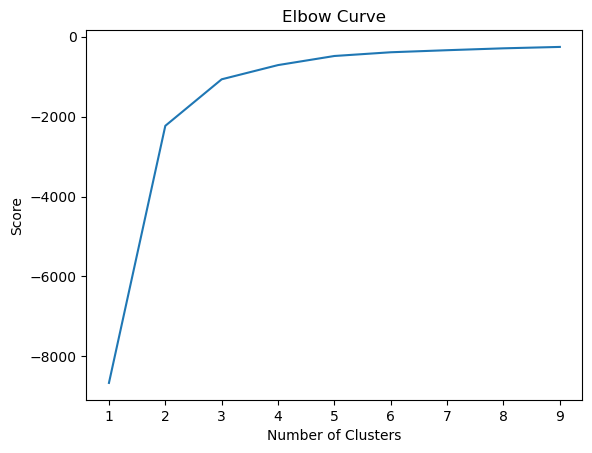

In [49]:
# Plot the elbow curve using PyLab

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show() # Based on the elbow curve, we can see that it jumps rapidly from two to four on the x-axis, then rises only slightly after four. Thi

In [50]:
### 5. k-means clustering

# Create the k-means object

kmeans = KMeans(n_clusters = 4, n_init=10)

In [51]:
# Fit the k-means object to the data

kmeans.fit(df_num_col)

C:\Users\brian\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=4, n_init=10)

In [52]:
# Adding clusters column to a dataframe

df_num_col['clusters'] = kmeans.fit_predict(df_num_col)

C:\Users\brian\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [53]:
df_num_col.head() # Check on new column for clusters

,Review_Year,Cocoa_Pct,Rating,clusters
0,2007,0.75,4.0,2
1,2007,0.63,3.5,2
2,2006,0.70,5.0,2
3,2006,0.66,4.0,2
4,2012,0.70,2.5,3


In [54]:
df_num_col['clusters'].value_counts()

0    338
3    245
1    190
2    111
Name: clusters, dtype: int64

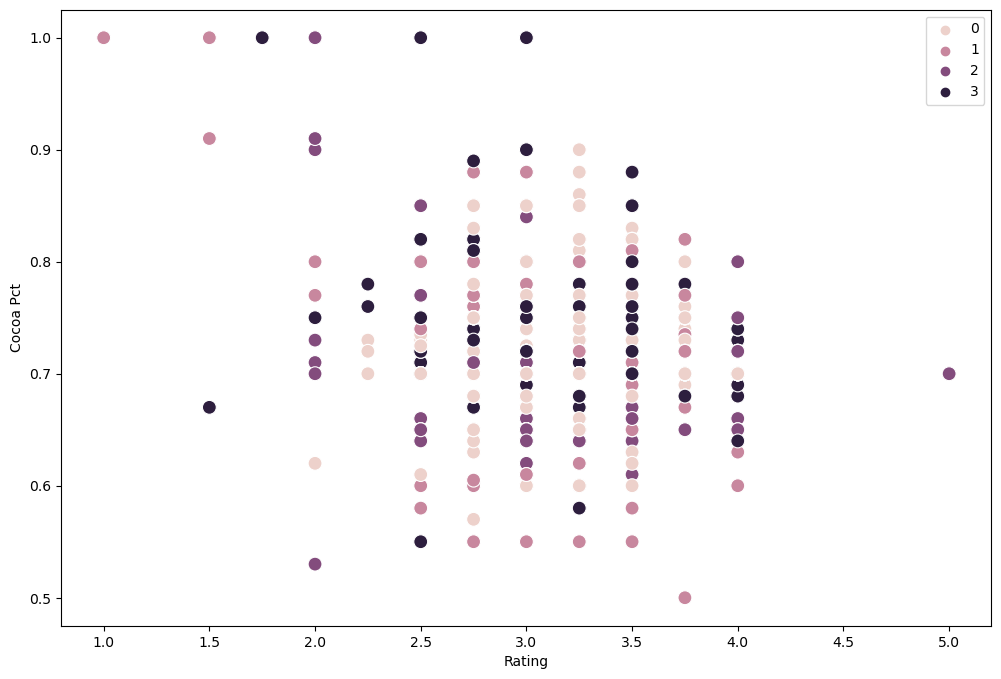

In [55]:
### 6. Plot the clusters 

# 'rating' vs 'Cocoa percent'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num_col['Rating'], y=df_num_col['Cocoa_Pct'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Rating')
plt.ylabel('Cocoa Pct')
plt.show()

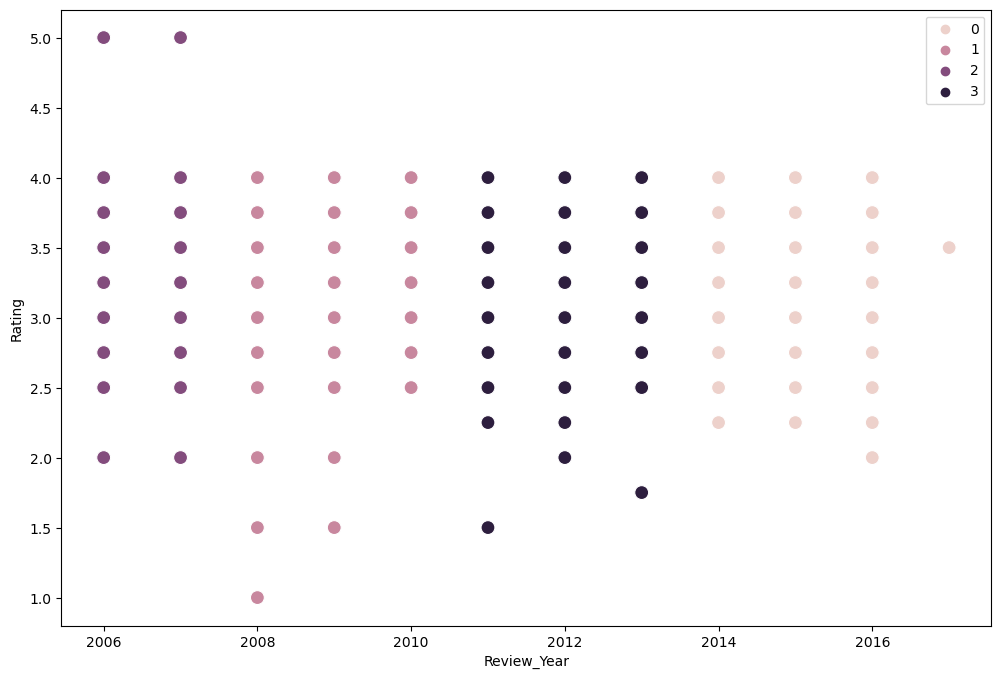

In [57]:
# 'rating' vs 'Review Year'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num_col['Review_Year'], y=df_num_col['Rating'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Review_Year')
plt.ylabel('Rating')
plt.show()

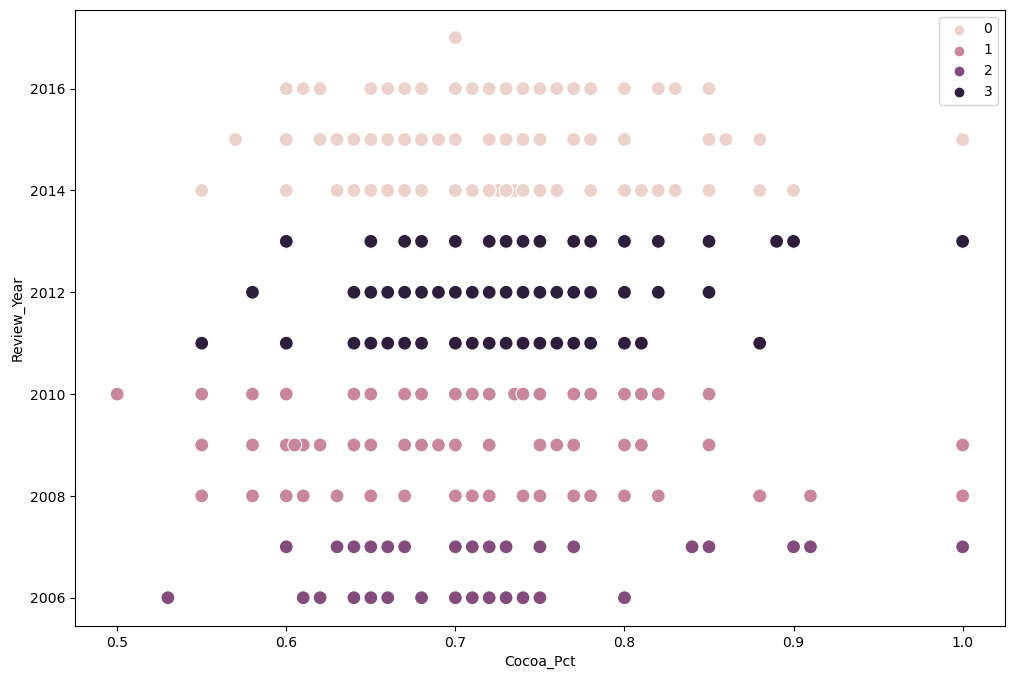

In [59]:
# 'Cocoa percent' vs 'Review Year'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num_col['Cocoa_Pct'], y=df_num_col['Review_Year'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Cocoa_Pct')
plt.ylabel('Review_Year')
plt.show()

In [ ]:
### Clustering makes sense for the year as it seems that it clustered per year for the two last charts. 
#However, it does not make much sense in the first chart. 
#Colors are being scattered and clustered on one to another making the analysis difficult. 


In [61]:
### 7. Descriptive Statistics

#rename clusters
df_num_col.loc[df_num_col['clusters'] == 3, 'cluster'] = 'dark brown'
df_num_col.loc[df_num_col['clusters'] == 2, 'cluster'] = 'brown'
df_num_col.loc[df_num_col['clusters'] == 1, 'cluster'] = 'orange'
df_num_col.loc[df_num_col['clusters'] == 0, 'cluster'] = 'light orange'

In [62]:
df_num_col.groupby('clusters').agg({'Review_Year':['mean', 'median'],'Cocoa_Pct':['mean', 'median'],'Rating':['mean', 'median']})

Review_Year         Cocoa_Pct           Rating       
                 mean  median      mean median      mean median
clusters                                                       
0         2014.920118  2015.0  0.719068   0.70  3.257396   3.25
1         2008.952632  2009.0  0.714632   0.70  3.117105   3.00
2         2006.504505  2007.0  0.710360   0.70  3.304054   3.50
3         2011.987755  2012.0  0.723469   0.72  3.244898   3.25

In [ ]:
### 8. Insights and propose what these results could be useful for in future steps of an analytics pipeline


#In general, there isn't a significant difference in the number of clusters, except concerning the year variable. #
#This indicates that overall scores were slightly lower around 2008/9 compared to other years, aligning with the chart above, illustrating an improvement in ratings over time.

#The orange cluster demonstrates a slightly lower value, averaging around 3.09, in contrast to the other clusters, which hover closer to the 3.20s, showcasing their greater similarity.

#Regarding cocoa percentage, the values are quite comparable in each cluster, both in terms of mean and median. This could be attributed to the majority of ratings falling within the 70-80% range, highlighting limitations and biases within the dataset.

#The insights gleaned from these findings are somewhat limited. Further analysis involving other variables could enhance our understanding. Exploring how these variables have evolved over time may uncover anomalies, trends, or developments and could be a valuable future step in the analysis.